# Progetto di Data and Web mining

Matteo Spanio, A.A. 2021/2022

# Random Forest

Visto il risultato ottenuto con gli alberi di decisione

## Globalmente

In [1]:
import Zillow.data as zd
import warnings
warnings.filterwarnings("ignore")

train, validation, test = zd.get_preprocessed_data()

X_train, y_train = zd.split_x_y(train)
X_validation, y_validation = zd.split_x_y(validation)
X_test, y_test = zd.split_x_y(test)

In [6]:
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

len(X_small), len(y_small)

(21486, 21486)

In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [x for x in range(100, 1001, 100)],
    'max_features': ['sqrt', 'log2', 1.0],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20, 50],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=4,
                         n_jobs = -1)

gscv.fit(X_small, y_small)

gscv.best_params_

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.072) total time=   8.6s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  17.0s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.075) total time=   8.6s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  17.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.073) total time=  25.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.073) total time=  33.7s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.074) total time=   8.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  16.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  25.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  33.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  42.1s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.038, test=-0.073) total time=  15.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=(train=-0.038, test=-0.073) tot

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.073) total time=   3.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.047, test=-0.072) total time=   7.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.072) total time=  10.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.072) total time=  13.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.072) total time=  21.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.072) total time=  28.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=(train=-0.047, test=-0.0

[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=(train=-0.038, test=-0.071) total time=  33.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.071) total time=   3.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.048, test=-0.070) total time=   7.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.070) total time=  10.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.070) total time=  13.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.070) total time=  20.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.070

[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=(train=-0.037, test=-0.073) total time=  37.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-0.047, test=-0.073) total time=  17.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=(train=-0.046, test=-0.073) total time=  24.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=(train=-0.047, test=-0.072) total time=  31.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=100;, score=(train=-0.055, test=-0.073) total time=   3.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=(train=-0.054, test=-0.072) total time=   6.7s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=(train=-0.054, test=-0.07

[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=(train=-0.063, test=-0.071) total time=   5.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=(train=-0.062, test=-0.071) total time=   7.7s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400;, score=(train=-0.063, test=-0.071) total time=  10.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  20.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.062, test=-0.071) total time=  25.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.062, test=-0.

[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.063, test=-0.069) total time=  10.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800;, score=(train=-0.063, test=-0.069) total time=  20.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500;, score=(train=-0.063, test=-0.069) total time=  12.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=700;, score=(train=-0.063, test=-0.069) total time=  17.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.063, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.062, test=-0.072) total time=  23.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.072) total time=   2.5s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   4.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.069) total time=  12.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, tes

[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=400;, score=(train=-0.062, test=-0.071) total time=  10.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  19.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.069) total time=  16.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, te

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=600;, score=(train=-0.068, test=-0.070) total time=  10.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  17.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.068, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   5.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   8.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=  12.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=900;, score=(train=-0.068, test=-0.071) total time=  14.9s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100;, score=(train=-0.068, test=-0.070) total time=   1.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=(train=-0.068, test=-0.071) total time=   3.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.029, test=-0.074) total time=   3.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.073) total time=   6.4s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-0.027, test=-0.073) total time=   9.8s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=-0.027, test=-0.073) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=(train=-0.027, test=-0.073) total time=  22.6s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900;, score=(train=-0.027, test=-0.073) total time=  28.9s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.041, test=-0.074) tota

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  17.1s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  13.0s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  19.5s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  26.0s
[CV 3/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  32.6s
[CV 4/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.039, test=-0.073

[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.071) total time=   1.9s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.065, test=-0.071) total time=   3.8s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.065, test=-0.071) total time=   5.6s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.065, test=-0.071) total time=   7.6s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  11.3s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  15.1s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   5.4s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.7s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=(train=-0.065, test=-0.069) total time=  14.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=(train=-0.064, test=-0.070) total time=  12.5s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=(train=-0.064, test=-0.070) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=(train=-0.064, test=-0.070) total time=   5.4s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.064, test=-0.070) total time=   7.1s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.6s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  14.2s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.064, test=-0.069) total time=  17.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.064, test=-0.071) total time=   8.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=(train=-0.064, test=-0.071) total time=  12.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=900;, score=(train=-0.064, test=-0.069) total time=  16.3s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=600;, score=(train=-0.067, test=-0.071) total time=   9.2s
[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=800;, score=(train=-0.067, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=1000;, score=(train=-0.067, test=-0.068) total time=  15.2s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   6.0s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=   8.4s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  10.9s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=100;, score=(train=-0.069, test=-

[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   3.6s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=500;, score=(train=-0.069, test=-0.068) total time=   6.1s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.5s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=900;, score=(train=-0.069, test=-0.070) total time=  11.0s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.069, test=-0.070) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.068, test=-0.071) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=200;, score=(train=-0.068, test=-0

[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.069, test=-0.068) total time=  12.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500;, score=(train=-0.069, test=-0.070) total time=   6.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.8s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  11.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100;, score=(train=-0.069, test=-0.068) total time=   1.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.068) total time=   2.5s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.070) total time=   2.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.069, test=-0.070) total time=   3.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.069, test=-0.070) total time=   4.9s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.069, test=-0.070) total time=   7.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=800;, score=(train=-0.069, test=-0.070) total time=   9.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  12.3s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=400;, score=(train=-0.068, te

[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=(train=-0.048, test=-0.074) total time= 3.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=(train=-0.049, test=-0.072) total time=  48.4s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=(train=-0.049, test=-0.072) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=(train=-0.049, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=(train=-0.049, test=-0.071) total time= 2.4min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=(train=-0.049, test=-0.071) total time= 3.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=(train=-0.049, test=-0.071) total time

[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=(train=-0.048, test=-0.073) total time= 3.7min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=-0.049, test=-0.074) total time=  23.6s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=(train=-0.049, test=-0.074) total time=  47.4s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=(train=-0.048, test=-0.074) total time= 1.2min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=(train=-0.048, test=-0.074) total time= 1.6min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=600;, score=(train=-0.048, test=-0.074) total time= 2.4min
[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=800;, score=(train=-0.048, test=-0.073) total

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=(train=-0.055, test=-0.071) total time=  47.5s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=(train=-0.055, test=-0.071) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=(train=-0.055, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=600;, score=(train=-0.055, test=-0.071) total time= 2.3min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=800;, score=(train=-0.055, test=-0.071) total time= 3.1min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=1000;, score=(train=-0.055, test=-0.071) total time= 3.9min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=500;, score=(train=-0.061, test=-0.070) tot

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.062, test=-0.071) total time=  22.1s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.062, test=-0.071) total time=  44.3s
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.061, test=-0.072) total time= 1.1min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.061, test=-0.072) total time= 1.5min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.061, test=-0.072) total time= 2.2min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.061, test=-0.072) total time= 3.0min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.061, test=-0.070) tot

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

In [28]:
gscv.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

In [26]:
gscv.best_score_

-0.06988672346647738

Alleniamo il modello individuato su il dataset di test

In [50]:
from Zillow.metrics import print_measure, measure_model

scores = {}

rf1 = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=50,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_validation)

scores['grid_search_fst'] = measure_model(y_true=y_validation, y_pred=y_pred)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07053
 Mean squared error: 0.02973
           R2 score: 0.01090


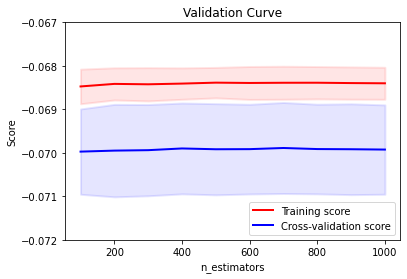

In [23]:
import Zillow.visualization as zv

zv.plot_grid_search_validation_curve(gscv, 'n_estimators', ylim=(-.072,-.067))

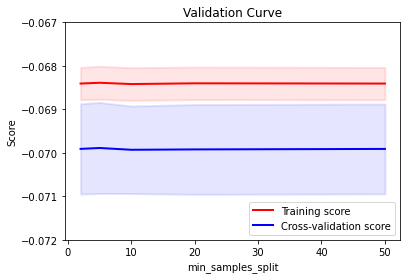

In [22]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_split', ylim=(-.072,-.067))

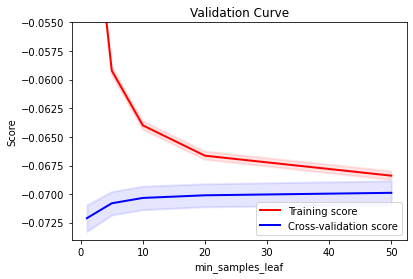

In [15]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.074,-.055))

Sembra che il variare di numero di alberi e il minimo numero di campioni per ogni nodo abbia poco impatto sulla performance del modello, mentre sembra che aumentare il numero di campioni per foglia porti verso una convergenza.

A questo punto potrebbe valere la pena studiare ulteriormente cosa succede al variare del parametro più significativo. I parametri utilizzati saranno quelli ottimi individuati dal precedente `gridsearchCV` ad eccezione del numero di alberi, infatti dal grafico sembra che il numero di alberi abbia poca influenza sul risultato, si è quindi preso il punto di massimo relativo più vicino (400 invece di 700)

In [39]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [400],
    'max_features': ['log2'],
    'min_samples_split': [5],
    'min_samples_leaf': [x for x in range(10, 501, 10)],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=1,
                         n_jobs = -1)

gscv.fit(X_small, y_small)
gscv.best_params_, gscv.best_score_

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 2.89 s, sys: 68.8 ms, total: 2.96 s
Wall time: 1min 39s


({'max_features': 'log2',
  'min_samples_leaf': 400,
  'min_samples_split': 5,
  'n_estimators': 400},
 -0.06976914860176282)

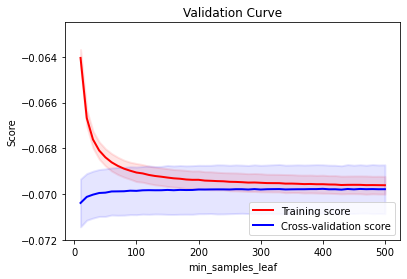

In [41]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.072,-.0625))

In [51]:
rf2 = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=400,
                           min_samples_split=5,
                           n_estimators=400,
                           random_state=42)

rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_validation)

scores['grid_search_snd'] = measure_model(y_true=y_validation, y_pred=y_pred)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07061
 Mean squared error: 0.02986
           R2 score: 0.00663


## Feature selection

Grazie alla random forest abbiamo anche la possibilità di ottenere la valutazione delle features maggiormente usate dagli alberi, e quindi determinarne l'importanza, se si sono colonne correlate o del tutto inutilizzate potrebbe essere molto utile rimuoverle

In [120]:
rf1.feature_importances_

array([2.70419098e-02, 2.48690946e-02, 8.62044607e-02, 8.32750600e-02,
       2.76418045e-03, 7.17343111e-02, 6.60532432e-02, 6.09762886e-02,
       7.61935273e-03, 6.55386246e-02, 5.68705748e-03, 8.01784987e-02,
       8.10145290e-02, 7.50496535e-02, 9.91452205e-02, 3.70726349e-03,
       5.88636836e-03, 2.67877943e-02, 4.20115499e-02, 1.20606466e-02,
       9.45825488e-04, 4.62941266e-03, 1.38722808e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.59841381e-03, 7.31832601e-04,
       8.10506275e-03, 1.89589253e-03, 2.00894511e-04, 3.34019270e-03,
       3.05130299e-04, 7.63067488e-04, 6.22977525e-03, 3.79918510e-03,
       2.05150426e-06, 1.10176625e-04, 4.56952237e-03, 4.62348165e-03,
       5.30028984e-03, 1.11928974e-04, 0.00000000e+00, 3.79506807e-03,
       0.00000000e+00, 2.05684628e-03, 1.10761819e-04, 1.05971114e-04,
       7.35860241e-04, 9.58196705e-04, 0.00000000e+00, 5.60782697e-03,
       0.00000000e+00, 6.78441080e-04, 3.60977603e-03, 1.66562717e-03,
      

In [53]:
rf2.feature_importances_

array([3.64470345e-02, 3.94724972e-02, 9.80247211e-02, 1.08295741e-01,
       3.13132804e-03, 4.97857861e-02, 5.38764332e-02, 4.37577424e-02,
       7.11710921e-03, 5.75337582e-02, 4.49162591e-03, 7.97105761e-02,
       8.13090931e-02, 6.18465027e-02, 1.32993969e-01, 5.97730306e-03,
       5.56108544e-03, 2.17422217e-02, 2.84095944e-02, 1.69567284e-02,
       1.99252484e-05, 5.33809319e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.90504037e-03, 0.00000000e+00,
       1.18935702e-02, 1.35181896e-03, 6.34923877e-05, 2.26983578e-03,
       3.75076583e-05, 1.45972583e-04, 5.93373157e-03, 1.83721114e-03,
       0.00000000e+00, 7.75371731e-05, 2.51002121e-03, 3.12440137e-03,
       3.39920184e-03, 0.00000000e+00, 0.00000000e+00, 4.24087152e-03,
       0.00000000e+00, 1.03083470e-03, 0.00000000e+00, 0.00000000e+00,
       1.86874988e-04, 8.46025117e-05, 0.00000000e+00, 6.78974067e-03,
       0.00000000e+00, 1.00649819e-04, 3.90624428e-03, 1.50680512e-03,
      

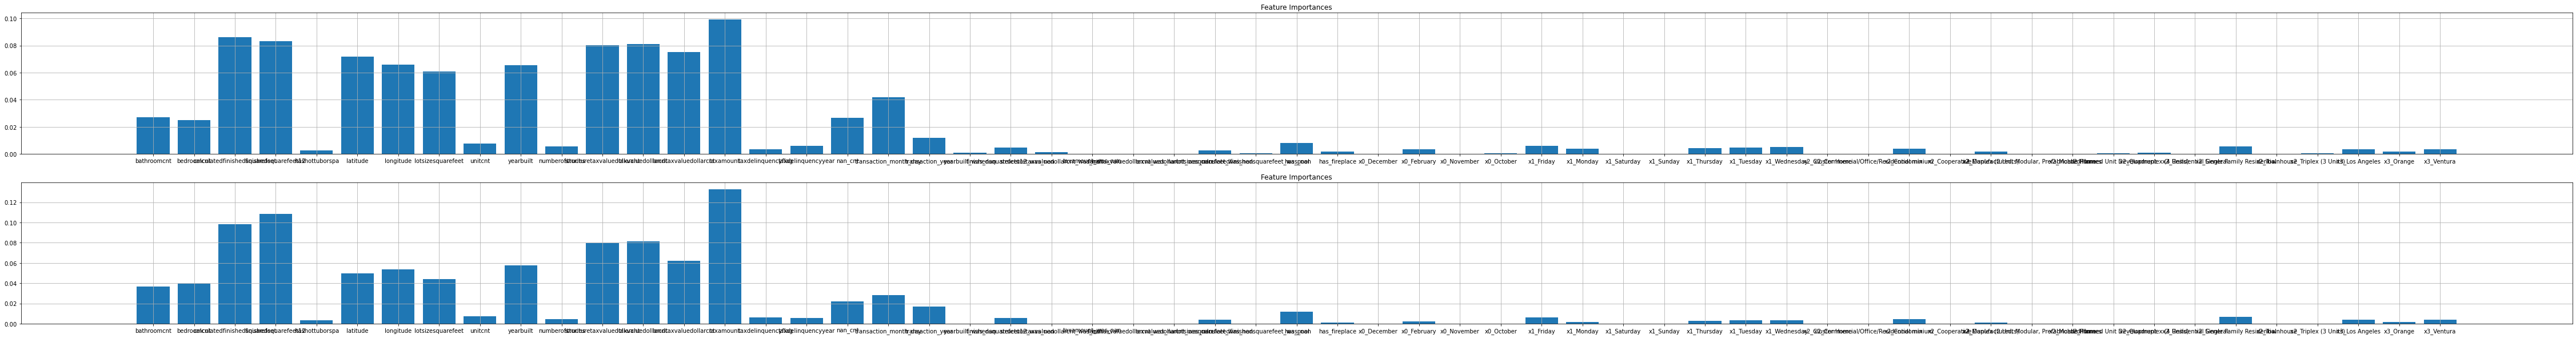

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = X_train.columns.to_list()

fig, axs = plt.subplots(nrows=2, figsize=(80,10))
axs[0].bar(range(0,X_train.shape[1]), rf1.feature_importances_)
axs[0].set_title("Feature Importances")
axs[0].set_xticks(range(X_train.shape[1]))
axs[0].set_xticklabels(feature_names)
axs[0].grid();

axs[1].bar(range(0,X_train.shape[1]), rf2.feature_importances_)
axs[1].set_title("Feature Importances")
axs[1].set_xticks(range(X_train.shape[1]))
axs[1].set_xticklabels(feature_names)
axs[1].grid();

Come si vede dai grafici molte delle feature che sono state aggiunte sono del tutto inutilizzate

In [127]:
%%time
from sklearn.model_selection import cross_val_score
import numpy as np

best_features = np.argsort(rf1.feature_importances_)[::-1]

rmae = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=700,
                                     min_samples_split=5,
                                     min_samples_leaf=50,
                                     max_features='log2',
                                     random_state=42)
    scores = cross_val_score(rf_small, 
                             X_small.iloc[:,best_features[:f]], y_small, 
                             cv=4, scoring='neg_mean_absolute_error', n_jobs=-1)
    rmae += [-scores.mean()]
    
print ("Full score:", rmae[-1])
print ("Best score:", min(rmae))

Full score: 0.069911378895871
Best score: 0.06990763237795906
CPU times: user 1.52 s, sys: 424 ms, total: 1.95 s
Wall time: 12min


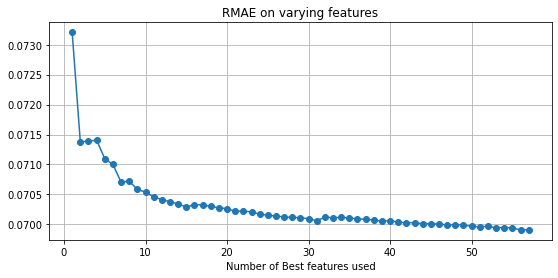

In [128]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(best_features)+1), rmae, 'o-', label="RMAE")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();

In [130]:
most_important_features = np.array(feature_names)[np.argsort (rf1.feature_importances_)[::-1]][:31]
print(most_important_features)

['taxamount' 'calculatedfinishedsquarefeet' 'finishedsquarefeet12'
 'taxvaluedollarcnt' 'structuretaxvaluedollarcnt' 'landtaxvaluedollarcnt'
 'latitude' 'longitude' 'yearbuilt' 'lotsizesquarefeet'
 'transaction_month_day' 'bathroomcnt' 'nan_cnt' 'bedroomcnt'
 'transaction_year' 'has_pool' 'unitcnt' 'x1_Friday' 'taxdelinquencyyear'
 'numberofstories' 'x2_Single Family Residential' 'x1_Wednesday'
 'finishedsquarefeet12_was_nan' 'x1_Tuesday' 'x1_Thursday' 'x1_Monday'
 'x2_Condominium' 'taxdelinquencyflag' 'x3_Los Angeles' 'x3_Ventura'
 'x0_February']


In [89]:
rf_31_f = RandomForestRegressor(n_estimators=400,
                                     min_samples_split=5,
                                     min_samples_leaf=50,
                                     max_features='log2',
                                     random_state=42,
                                     n_jobs=-1)

rf_31_f.fit(X_train.loc[:,most_important_features], y_train)
print_measure(y_true=y_validation, y_pred=rf_31_f.predict(X_validation.loc[:,most_important_features]))

Mean absolute error: 0.07066
 Mean squared error: 0.02970
           R2 score: 0.01188


Proviamo più seriamente

In [114]:
%%time
from sklearn.feature_selection import RFECV

rf_small = RandomForestRegressor(n_estimators=400,
                                 min_samples_split=5,
                                 min_samples_leaf=50,
                                 max_features='log2',
                                 random_state=42)
selector = RFECV(rf_small,
                 step=1,
                 cv=4,
                 scoring='neg_mean_absolute_error',
                 min_features_to_select=5,
                 verbose=1,
                 n_jobs=-1)
selector.fit(X_small,y_small)

CPU times: user 11.3 s, sys: 180 ms, total: 11.5 s
Wall time: 6min 27s


RFECV(cv=4,
      estimator=RandomForestRegressor(max_features='log2', min_samples_leaf=50,
                                      min_samples_split=5, n_estimators=400,
                                      random_state=42),
      min_features_to_select=5, n_jobs=-1, scoring='neg_mean_absolute_error',
      verbose=1)

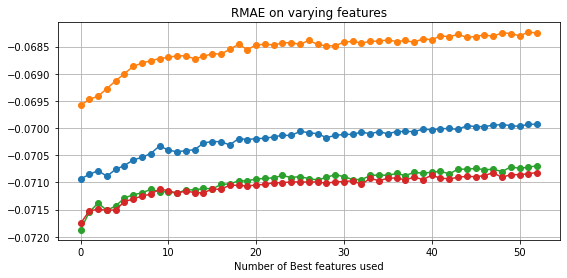

In [125]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot( selector.grid_scores_, 'o-', label="cross validation score")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();